In [1]:
import os
import operator
import numpy as np
from typing import List
from gensim.models import KeyedVectors, Word2Vec
from gensim.test.utils import datapath
import matplotlib.pyplot as plt
from compute_accuracy import compute_accuracy

In [2]:
wv = KeyedVectors.load_word2vec_format('word2vec-cc100-cbow-d100-w3-min10-epochs200.vectors', binary=False)

In [3]:
wv.similarity('шчанюк', 'сабака')

0.8059627

In [4]:
compute_accuracy(lambda w1, w2: wv.similarity(w1, w2))

Failed ['вуліца', 'дом', 'парк', 'плошча', 'праспект', 'сквер', 'завулак', 'бульвар'] / вёска
Failed ['галава', 'рука', 'нага', 'тулава', 'шыя', 'палец', 'спіна', 'плячо'] / шапка
Failed ['яблык', 'банан', 'апельсін', 'персік', 'груша', 'сліва', 'мандарын', 'ківі'] / морква
Failed ['ласось', 'карп', 'шчупак', 'акунь', 'вугор', 'плотка', 'сом', 'стронга'] / рака
Failed ['ласось', 'карп', 'шчупак', 'акунь', 'вугор', 'плотка', 'сом', 'стронга'] / кіт
Failed ['ласось', 'карп', 'шчупак', 'акунь', 'вугор', 'плотка', 'сом', 'стронга'] / плаўнік
Failed ['ласось', 'карп', 'шчупак', 'акунь', 'вугор', 'плотка', 'сом', 'стронга'] / дно
Failed ['ласось', 'карп', 'шчупак', 'акунь', 'вугор', 'плотка', 'сом', 'стронга'] / васьміног
Failed ['ласось', 'карп', 'шчупак', 'акунь', 'вугор', 'плотка', 'сом', 'стронга'] / човен
Failed ['планета', 'зорка', 'камета', 'астэроід', 'галактыка', 'метэарыт', 'квазар', 'туманнасць'] / марс
Failed ['таракан', 'клешч', 'муха', 'вош', 'клоп', 'блыха', 'камар', 'авадзень

0.8448275862068966

In [5]:
model = Word2Vec.load("word2vec-cc100-cbow-d100-w3-min10-epochs200.model")

Let's check whether we have correlation between frequency of a word and its average similarity to another word.

In [6]:
vocab_size = len(model.wv.index_to_key)
pairs = [(np.random.randint(vocab_size), np.random.randint(vocab_size)) for _ in range(1000)]
similarities = [model.wv.similarity(model.wv.index_to_key[p[0]], model.wv.index_to_key[p[1]]) for p in pairs]

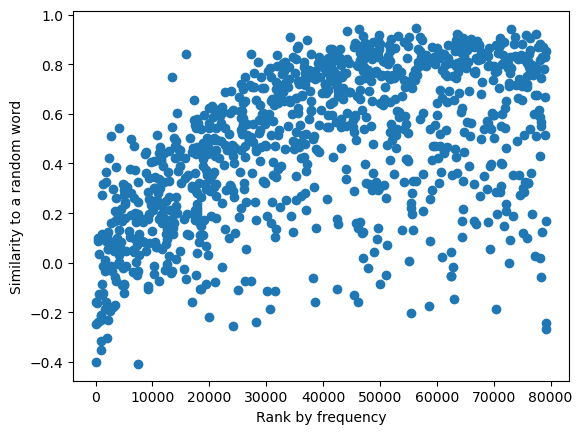

In [7]:
plt.scatter([p[0] for p in pairs], similarities)
plt.xlabel('Rank by frequency')
plt.ylabel('Similarity to a random word')
plt.show()

Checking most similar words for a rare word:

In [8]:
model.wv.get_vecattr("пітон","count")

289

In [9]:
closest_words = []
for word, similarity in model.wv.most_similar('пітон', topn=5000):
    closest_words.append((word, similarity, model.wv.get_vecattr(word,"count"))) 

for word, similarity, count in closest_words[:20]:
    print(word.ljust(10) + "\t" + "%.2f" % similarity, count)

хвастаты  	0.93 182
вожыкаў   	0.93 259
бегемот   	0.92 259
гіена     	0.92 237
кобра     	0.91 189
янот      	0.91 352
андатра   	0.91 121
хамяк     	0.90 358
палёўка   	0.90 122
антылопа  	0.90 266
гадзюка   	0.90 525
таракан   	0.90 399
тхор      	0.90 260
качаня    	0.90 303
сумчаты   	0.90 133
хорт      	0.90 181
аднарог   	0.90 357
страус    	0.90 328
шэршань   	0.90 329
рапуха    	0.90 202


It seems rare words are very close to other rare words. Let's find whether some frequent words are close too.

In [18]:
frequent_words = [i for i in range(len(closest_words)) if closest_words[i][2] > 800]
frequent_words

[91,
 187,
 192,
 250,
 581,
 611,
 786,
 951,
 1168,
 1192,
 1212,
 1498,
 1585,
 1607,
 1609,
 1682,
 1829,
 1834,
 1907,
 2003,
 2275,
 2420,
 2637,
 2737,
 2773,
 2786,
 2849,
 3031,
 3227,
 4126,
 4143,
 4572,
 4835]

In [19]:
for ind in frequent_words:
    word, similarity, count = closest_words[ind]
    print(word.ljust(10) + "\t" + "%.2f" % similarity, count)

звярок    	0.87 944
яшчарка   	0.85 803
вуж       	0.85 814
папугай   	0.85 1002
змяя      	0.82 1732
слімак    	0.82 823
жаба      	0.82 2777
слон      	0.81 2047
лісіца    	0.81 1188
кошка     	0.81 2641
кацяня    	0.81 1502
рой       	0.80 831
малпа     	0.80 2678
шчанюк    	0.80 1266
шкура     	0.80 1321
котка     	0.80 3129
муха      	0.80 2928
камар     	0.80 1404
сабачка   	0.79 1501
мамант    	0.79 979
гном      	0.79 939
качка     	0.79 2810
мятла     	0.79 863
поні      	0.78 904
эльф      	0.78 879
коцік     	0.78 1309
тыгр      	0.78 1691
дыназаўр  	0.78 1641
змей      	0.78 3535
рысь      	0.77 1300
прусак    	0.77 1280
рыжы      	0.77 1057
кураня    	0.77 844


Doesn't make sense even for more frequent words. Let's check the structure of vectors

In [20]:
model.wv.get_vector('пітон')

array([-0.23312369,  0.07418086,  0.22086641,  0.01186543, -0.09975942,
       -0.31634346,  0.01099094,  0.43248197, -0.0274804 , -0.11619957,
       -0.25110242, -0.28276733,  0.13803963, -0.15222059,  0.08056275,
       -0.13009267, -0.02754818, -0.36260512,  0.07939383, -0.11424953,
        0.13665643,  0.15802069,  0.11592169, -0.23432232,  0.00215046,
        0.01170865, -0.10628341, -0.27163348, -0.3579119 ,  0.12446779,
        0.06005865,  0.07934688, -0.1987587 , -0.18597858,  0.02541227,
        0.13456562, -0.03990445, -0.05756963, -0.17024432, -0.27369243,
        0.04887302, -0.20918691, -0.15891866, -0.01380855,  0.22968504,
        0.01053445, -0.13539766, -0.08039858, -0.03362131,  0.02833088,
        0.10459037, -0.26099858,  0.04111028,  0.05025421, -0.20791322,
        0.20868722,  0.04020206,  0.01010844, -0.04905906,  0.02302592,
        0.03253999,  0.143912  , -0.13071577,  0.1054517 , -0.40442637,
        0.03791883,  0.09245974,  0.18022823, -0.06863802,  0.28

In [21]:
np.mean(np.abs(model.wv.get_vector('пітон')))

0.1342432

In [15]:
np.mean(np.abs(model.wv.get_vector('беларусь')))

3.8224764

In [16]:
coord_abs_values = [np.mean(np.abs(model.wv.get_vector(word))) for word in model.wv.index_to_key]

Text(0, 0.5, 'Mean absolute coordinate value of embedding')

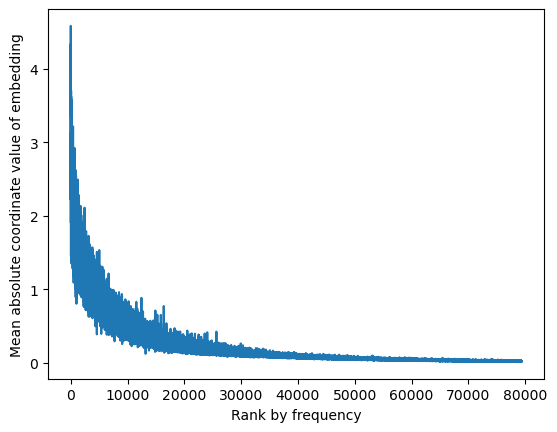

In [17]:
plt.plot(coord_abs_values)
plt.xlabel('Rank by frequency')
plt.ylabel('Mean absolute coordinate value of embedding')

Seems rare words have low absolute values for coordinates. This however doesn't explain the clustering of them from cosine similarity perspective.